In [1]:
import pathlib

import numpy as np
import pandas as pd

In [2]:
file_path = pathlib.Path(
    "../../data/6.analysis_results/mean_aggregated_levene_test_results.csv"
).resolve(strict=True)


df = pd.read_csv(file_path, index_col=0).reset_index(drop=True)
df

,feature,levene_statistic,levene_p_value,group,holm_bonferroni_p_value
0,AreaShape_Area,0.757577,0.388013,high_vs_unsel,0.388013
1,AreaShape_Area,13.490942,0.000551,high_vs_wt,0.001654
2,AreaShape_Area,4.643300,0.035738,unsel_vs_wt,0.071476
3,AreaShape_CentralMoment_0_0,0.757577,0.388013,high_vs_unsel,0.388013
4,AreaShape_CentralMoment_0_0,13.490942,0.000551,high_vs_wt,0.001654
...,...,...,...,...,...
727,Texture_Variance_OP_3_02_256,6.557652,0.013272,high_vs_wt,0.026543
728,Texture_Variance_OP_3_02_256,19.937342,0.000042,unsel_vs_wt,0.000127
729,Texture_Variance_OP_3_03_256,1.249779,0.268636,high_vs_unsel,0.268636
730,Texture_Variance_OP_3_03_256,6.845386,0.011501,high_vs_wt,0.023002


In [3]:
# subset the data
high_vs_wt = df.loc[df["group"] == "high_vs_wt"]
unsel_vs_wt = df.loc[df["group"] == "unsel_vs_wt"]
high_vs_unsel = df.loc[df["group"] == "high_vs_unsel"]

high_vs_wt.rename(
    columns={
        "levene_p_value": "high_vs_wt_levene_p_value",
        "holm_bonferroni_p_value": "high_vs_wt_levene_p_value_holm_bonferroni",
    },
    inplace=True,
)
unsel_vs_wt.rename(
    columns={
        "levene_p_value": "unsel_vs_wt_levene_p_value",
        "holm_bonferroni_p_value": "unsel_vs_wt_levene_p_value_holm_bonferroni",
    },
    inplace=True,
)
high_vs_unsel.rename(
    columns={
        "levene_p_value": "high_vs_unsel_levene_p_value",
        "holm_bonferroni_p_value": "high_vs_unsel_levene_p_value_holm_bonferroni",
    },
    inplace=True,
)


# drop columns
high_vs_wt.drop(columns=["group", "levene_statistic"], inplace=True)
unsel_vs_wt.drop(columns=["group", "levene_statistic"], inplace=True)
high_vs_unsel.drop(columns=["group", "levene_statistic"], inplace=True)


# combine the data
combined_df = pd.merge(high_vs_wt, unsel_vs_wt, on="feature")
combined_df = pd.merge(combined_df, high_vs_unsel, on="feature")
combined_df.head()

/tmp/ipykernel_1187218/3310347519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_vs_wt.rename(
/tmp/ipykernel_1187218/3310347519.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsel_vs_wt.rename(
/tmp/ipykernel_1187218/3310347519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_vs_unsel.rename(
/tmp/ipykernel_1187218/3310347519.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,feature,high_vs_wt_levene_p_value,high_vs_wt_levene_p_value_holm_bonferroni,unsel_vs_wt_levene_p_value,unsel_vs_wt_levene_p_value_holm_bonferroni,high_vs_unsel_levene_p_value,high_vs_unsel_levene_p_value_holm_bonferroni
0,AreaShape_Area,5.513078e-04,1.653923e-03,0.035738,0.071476,0.388013,0.388013
1,AreaShape_CentralMoment_0_0,5.513078e-04,1.653923e-03,0.035738,0.071476,0.388013,0.388013
2,AreaShape_CentralMoment_0_1,5.824431e-05,1.747329e-04,0.008999,0.017998,0.076247,0.076247
3,AreaShape_CentralMoment_0_2,2.678303e-07,8.034910e-07,0.025010,0.050021,0.087601,0.087601
4,AreaShape_CentralMoment_0_3,3.051610e-03,9.154829e-03,0.025802,0.051604,0.511016,0.511016


In [4]:
variance_df_path = pathlib.Path(
    "../../data/6.analysis_results/mean_aggregated_variance_results_each_feature.csv"
).resolve(strict=True)
variance_df = pd.read_csv(variance_df_path)
variance_df.head()

,Metadata_genotype,feature,variance
0,high,AreaShape_Area,0.516762
1,high,AreaShape_CentralMoment_0_0,0.516762
2,high,AreaShape_CentralMoment_0_1,2.361025
3,high,AreaShape_CentralMoment_0_2,1.147158
4,high,AreaShape_CentralMoment_0_3,0.716030


In [5]:
# replace metadata genotype with the correct group
variance_df["Metadata_genotype"].replace(
    {"high": "High-Severity", "unsel": "Mid-Severity", "wt": "Wild Type"}, inplace=True
)
variance_df.head()

,Metadata_genotype,feature,variance
0,High-Severity,AreaShape_Area,0.516762
1,High-Severity,AreaShape_CentralMoment_0_0,0.516762
2,High-Severity,AreaShape_CentralMoment_0_1,2.361025
3,High-Severity,AreaShape_CentralMoment_0_2,1.147158
4,High-Severity,AreaShape_CentralMoment_0_3,0.716030


In [6]:
high_severity = variance_df.loc[variance_df["Metadata_genotype"] == "High-Severity"]
mid_severity = variance_df.loc[variance_df["Metadata_genotype"] == "Mid-Severity"]
wt = variance_df.loc[variance_df["Metadata_genotype"] == "Wild Type"]

# rename the columns
high_severity.rename(columns={"variance": "high_severity_variance"}, inplace=True)
mid_severity.rename(columns={"variance": "mid_severity_variance"}, inplace=True)
wt.rename(columns={"variance": "wild_type_severity_variance"}, inplace=True)

# drop columns
high_severity.drop(columns=["Metadata_genotype"], inplace=True)
mid_severity.drop(columns=["Metadata_genotype"], inplace=True)
wt.drop(columns=["Metadata_genotype"], inplace=True)

high_severity.reset_index(drop=True, inplace=True)
mid_severity.reset_index(drop=True, inplace=True)
wt.reset_index(drop=True, inplace=True)

/tmp/ipykernel_1187218/3178541414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_severity.rename(columns={"variance": "high_severity_variance"}, inplace=True)
/tmp/ipykernel_1187218/3178541414.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_severity.rename(columns={"variance": "mid_severity_variance"}, inplace=True)
/tmp/ipykernel_1187218/3178541414.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wt.rename(columns

In [7]:
all_severities = pd.merge(
    mid_severity, high_severity, left_on="feature", right_on="feature"
)
all_severities = pd.merge(all_severities, wt, left_on="feature", right_on="feature")
combined_df = pd.merge(combined_df, all_severities, on="feature")
combined_df.head()

,feature,high_vs_wt_levene_p_value,high_vs_wt_levene_p_value_holm_bonferroni,unsel_vs_wt_levene_p_value,unsel_vs_wt_levene_p_value_holm_bonferroni,high_vs_unsel_levene_p_value,high_vs_unsel_levene_p_value_holm_bonferroni,mid_severity_variance,high_severity_variance,wild_type_severity_variance
0,AreaShape_Area,5.513078e-04,1.653923e-03,0.035738,0.071476,0.388013,0.388013,0.495298,0.516762,0.062573
1,AreaShape_CentralMoment_0_0,5.513078e-04,1.653923e-03,0.035738,0.071476,0.388013,0.388013,0.495298,0.516762,0.062573
2,AreaShape_CentralMoment_0_1,5.824431e-05,1.747329e-04,0.008999,0.017998,0.076247,0.076247,1.031745,2.361025,0.073716
3,AreaShape_CentralMoment_0_2,2.678303e-07,8.034910e-07,0.025010,0.050021,0.087601,0.087601,0.919332,1.147158,0.041874
4,AreaShape_CentralMoment_0_3,3.051610e-03,9.154829e-03,0.025802,0.051604,0.511016,0.511016,2.166008,0.716030,0.122179


In [8]:
# make a new column that contains permutation test results for each feature
np.random.seed(0)
n_permutations = 1000
# permute each column
permuted_df = combined_df.copy()
for column in permuted_df.columns:
    if column != "feature":
        permuted_df[column] = np.random.permutation(permuted_df[column].values)

In [9]:
combined_df.head()

,feature,high_vs_wt_levene_p_value,high_vs_wt_levene_p_value_holm_bonferroni,unsel_vs_wt_levene_p_value,unsel_vs_wt_levene_p_value_holm_bonferroni,high_vs_unsel_levene_p_value,high_vs_unsel_levene_p_value_holm_bonferroni,mid_severity_variance,high_severity_variance,wild_type_severity_variance
0,AreaShape_Area,5.513078e-04,1.653923e-03,0.035738,0.071476,0.388013,0.388013,0.495298,0.516762,0.062573
1,AreaShape_CentralMoment_0_0,5.513078e-04,1.653923e-03,0.035738,0.071476,0.388013,0.388013,0.495298,0.516762,0.062573
2,AreaShape_CentralMoment_0_1,5.824431e-05,1.747329e-04,0.008999,0.017998,0.076247,0.076247,1.031745,2.361025,0.073716
3,AreaShape_CentralMoment_0_2,2.678303e-07,8.034910e-07,0.025010,0.050021,0.087601,0.087601,0.919332,1.147158,0.041874
4,AreaShape_CentralMoment_0_3,3.051610e-03,9.154829e-03,0.025802,0.051604,0.511016,0.511016,2.166008,0.716030,0.122179


In [31]:
dict_of_dfs = {"non_permuted": combined_df, "permuted": permuted_df}
output_dfs = {"non_permuted": "", "permuted": ""}
for key in dict_of_dfs:
    df = dict_of_dfs[key]
    # variance logic
    # wt < mid
    # mid > high
    # high not > wt
    # high not < wt
    df["variance_pattern_bool"] = np.where(
        (df["high_severity_variance"] < df["mid_severity_variance"])
        & (df["wild_type_severity_variance"] < df["mid_severity_variance"]),
        True,
        False,
    )
    # levene logic
    # high_vs_unsel <0.05
    # wt_vs_unsel <0.05
    # high_vs_wt >0.05
    df["significance_bool"] = np.where(
        (df["high_vs_unsel_levene_p_value"] < 0.05)
        & (df["unsel_vs_wt_levene_p_value"] < 0.05)
        & (df["high_vs_wt_levene_p_value"] > 0.05),
        True,
        False,
    )

    df["significance_bool_half_baked"] = np.where(
        (df["high_vs_unsel_levene_p_value"] < 0.05)
        & (df["unsel_vs_wt_levene_p_value"] < 0.05),
        True,
        False,
    )

    df["hypothesis_test_bool"] = np.where(
        (df["variance_pattern_bool"] is True & df["significance_bool"] is True),
        True,
        False,
    )
    df["hypothesis_test_bool_half_baked"] = np.where(
        (
            df["variance_pattern_bool"]
            is True & df["significance_bool_half_baked"]
            is True
        ),
        True,
        False,
    )

    output_dfs[key] = df

In [33]:
# enrichment analysis for each feature
df = output_dfs["non_permuted"]
df

,feature,high_vs_wt_levene_p_value,high_vs_wt_levene_p_value_holm_bonferroni,unsel_vs_wt_levene_p_value,unsel_vs_wt_levene_p_value_holm_bonferroni,high_vs_unsel_levene_p_value,high_vs_unsel_levene_p_value_holm_bonferroni,mid_severity_variance,high_severity_variance,wild_type_severity_variance,...,hypothesis_test_bool,hypothesis_test_bool_half_baked,feature_group,measurement,bone,parameter1,parameter2,parameter3,significance_bool,significance_bool_half_baked
0,AreaShape_Area,5.513078e-04,1.653923e-03,0.035738,0.071476,0.388013,0.388013,0.495298,0.516762,0.062573,...,False,False,AreaShape,Area,None,None,None,None,False,False
1,AreaShape_CentralMoment_0_0,5.513078e-04,1.653923e-03,0.035738,0.071476,0.388013,0.388013,0.495298,0.516762,0.062573,...,False,False,AreaShape,CentralMoment,0,0,None,None,False,False
2,AreaShape_CentralMoment_0_1,5.824431e-05,1.747329e-04,0.008999,0.017998,0.076247,0.076247,1.031745,2.361025,0.073716,...,False,False,AreaShape,CentralMoment,0,1,None,None,False,False
3,AreaShape_CentralMoment_0_2,2.678303e-07,8.034910e-07,0.025010,0.050021,0.087601,0.087601,0.919332,1.147158,0.041874,...,False,False,AreaShape,CentralMoment,0,2,None,None,False,False
4,AreaShape_CentralMoment_0_3,3.051610e-03,9.154829e-03,0.025802,0.051604,0.511016,0.511016,2.166008,0.716030,0.122179,...,False,False,AreaShape,CentralMoment,0,3,None,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,Texture_SumVariance_OP_3_03_256,2.516928e-02,5.033855e-02,0.000066,0.000197,0.228419,0.228419,0.275945,0.704282,1.173308,...,False,False,Texture,SumVariance,OP,3,03,256,False,False
240,Texture_Variance_OP_3_00_256,1.259534e-02,2.519068e-02,0.000039,0.000116,0.254632,0.254632,0.264104,0.648556,1.202267,...,False,False,Texture,Variance,OP,3,00,256,False,False
241,Texture_Variance_OP_3_01_256,1.075719e-02,2.151438e-02,0.000039,0.000116,0.265982,0.265982,0.263447,0.638035,1.220991,...,False,False,Texture,Variance,OP,3,01,256,False,False
242,Texture_Variance_OP_3_02_256,1.327157e-02,2.654313e-02,0.000042,0.000127,0.257732,0.257732,0.266423,0.653212,1.199268,...,False,False,Texture,Variance,OP,3,02,256,False,False


In [48]:
list_of_enrichment_dfs = []
for key in output_dfs:
    df = output_dfs[key]
    # split the feature column
    df[
        [
            "feature_group",
            "measurement",
            "bone",
            "parameter1",
            "parameter2",
            "parameter3",
        ]
    ] = df["feature"].str.split("_", expand=True)

    # get counts of each feature group and the hypothesis test bool
    hypothesis_tests_df = (
        df.groupby(["feature_group", "hypothesis_test_bool"])
        .size()
        .reset_index(name="counts")
    )
    hypothesis_tests_df["permutation"] = key
    list_of_enrichment_dfs.append(hypothesis_tests_df)
final_enrichment_df = pd.concat(list_of_enrichment_dfs)
final_enrichment_df.reset_index(drop=True, inplace=True)
final_enrichment_df.head()

,feature_group,hypothesis_test_bool,counts,permutation
0,AreaShape,False,98,non_permuted
1,Granularity,False,6,non_permuted
2,Intensity,False,15,non_permuted
3,Neighbors,False,3,non_permuted
4,RadialDistribution,False,70,non_permuted


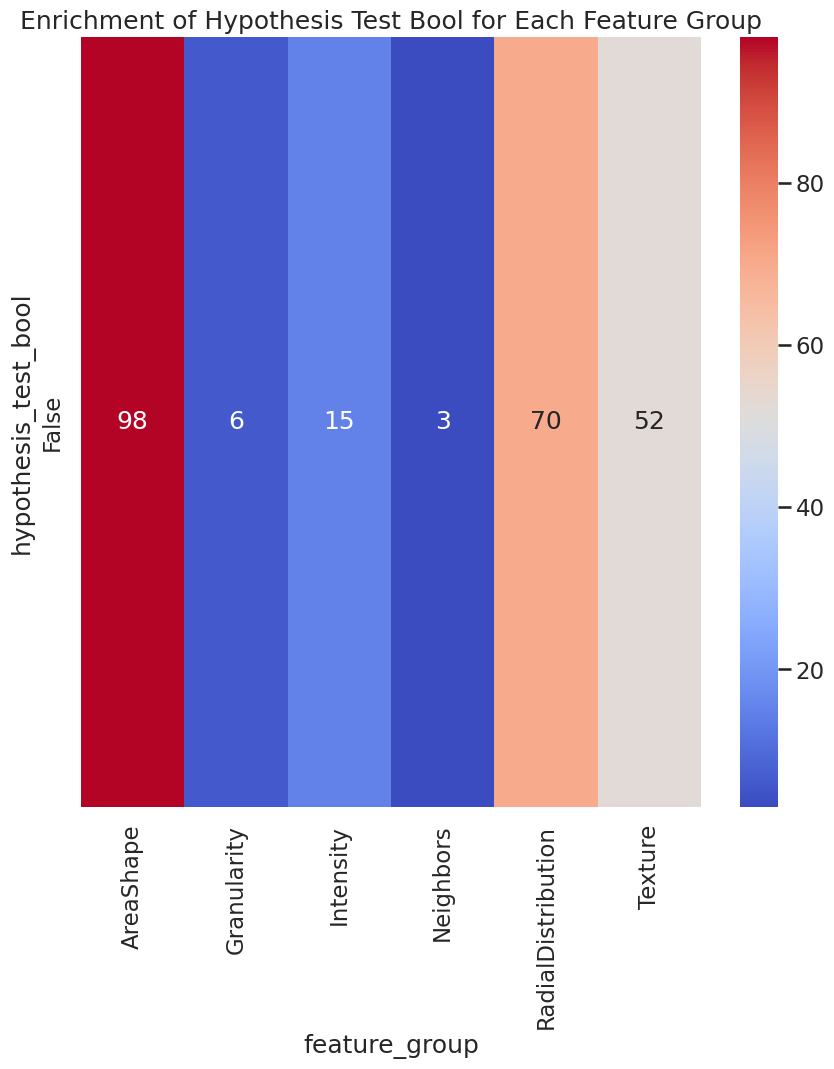

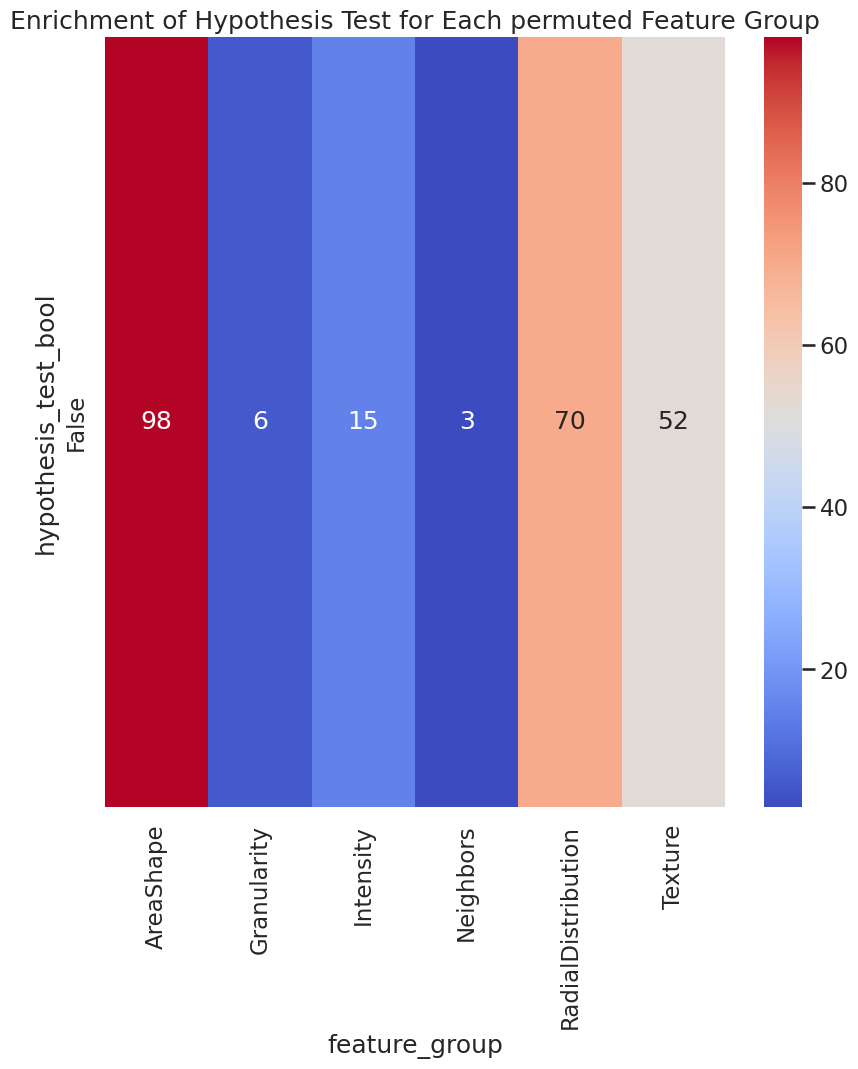

In [50]:
import matplotlib.pyplot as plt

# plot the results
import seaborn as sns

df_non_permuted = final_enrichment_df.loc[
    final_enrichment_df["permutation"] == "non_permuted"
]
# heatmap of true/false values for the hypothesis test bool against each feature type
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    df_non_permuted.pivot(
        index="hypothesis_test_bool", columns="feature_group", values="counts"
    ),
    annot=True,
    fmt="d",
    cmap="coolwarm",
    ax=ax,
)
plt.title("Enrichment of Hypothesis Test Bool for Each Feature Group")
plt.show()

df_permuted = final_enrichment_df.loc[final_enrichment_df["permutation"] == "permuted"]
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    df_permuted.pivot(
        index="hypothesis_test_bool", columns="feature_group", values="counts"
    ),
    annot=True,
    fmt="d",
    cmap="coolwarm",
    ax=ax,
)
plt.title("Enrichment of Hypothesis Test for Each permuted Feature Group")
plt.show()